In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [2]:
image_names = list(os.walk('./classify docs.v1i.multiclass/valid/'))[0][2]

In [3]:
len(image_names)

384

In [4]:
df = pd.read_csv('./classify docs.v1i.multiclass/valid_classes.csv')

In [5]:
df.head()

,filename,Aadhar,Pan,Unlabeled
0,kohad_jpg.rf.00a127aa7f1c32e79d28180a12ea0bfe.jpg,1,0,0
1,10_jpg.rf.000ae5c1f38e4dee8600f750e70d7da6.jpg,1,0,0
2,8763382432_jpg.rf.01ed43d338548249e821877d6f61...,0,0,1
3,673808240016_jpg.rf.02a080a6fffceb38c530142181...,0,0,1
4,01175336450013_jpg.rf.010e95ee4019e97b4bdf05bc...,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    384 non-null    object
 1    Aadhar     384 non-null    int64 
 2    Pan        384 non-null    int64 
 3    Unlabeled  384 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.1+ KB


In [7]:
aadhar_index = np.where(df[' Aadhar'] == 1)[0].tolist()
pan_index = np.where(df[' Pan'] == 1)[0].tolist()
df = df.iloc[aadhar_index+pan_index]
df = df.reset_index(drop=True)

In [8]:
X_val = []
y_val = []

for i in range(len(df)):
    
    img = np.array(Image.open(f"./classify docs.v1i.multiclass/valid/{df.iloc[i]['filename']}"))
    if img is not None:
        img = cv2.resize(img,(128,128))
        if(img.shape == (128,128,3)):
            X_val.append(img)
            if(df.iloc[i][' Aadhar']):
                y_val.append(0)
            elif(df.iloc[i][' Pan']):
                y_val.append(1)
            else:
                y_val.append(2)

In [9]:
X_val = np.array(X_val)
y_val = np.array(y_val)

In [10]:
X_val.shape, y_val.shape

((223, 128, 128, 3), (223,))

0


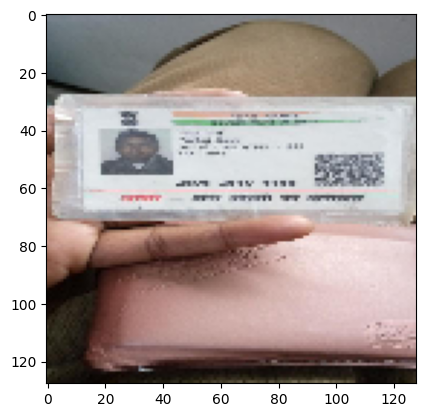

In [11]:
print(y_val[50])
plt.imshow(X_val[50])

In [12]:
np.save('./x_val.npy',X_val)
np.save('./y_val.npy',y_val)